# **TIMED CHALLENGE 5**

In [179]:
import pandas as pd

file_path = "/content/Districtwise_Crime_of_India_2001_to_2014.csv"
df = pd.read_csv(file_path)

In [180]:
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

df.columns = df.columns.str.upper()

df['STATE/UT'] = df['STATE/UT'].str.title()
df['DISTRICT'] = df['DISTRICT'].str.title()

df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,Andhra Pradesh,Adilabad,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,Andhra Pradesh,Anantapur,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,Andhra Pradesh,Chittoor,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,Andhra Pradesh,Cuddapah,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,Andhra Pradesh,East Godavari,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


# **PreProcessing and Data Cleaning**

In [181]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Step 1: Load data
df_original = pd.read_csv('/content/Districtwise_Crime_of_India_2001_to_2014.csv')

# Step 2: Drop unnecessary unnamed index column
df_cleaned_1 = df_original.drop(columns=['Unnamed: 0'])

# Step 3: Drop missing values
df_cleaned_2 = df_cleaned_1.dropna()

# Step 4: Drop duplicates
df_cleaned_3 = df_cleaned_2.drop_duplicates()

# Step 5: Remove outliers using IQR
# Step 5 (Modified): Cap outliers instead of removing them
df_cleaned_4 = df_cleaned_3.copy()
numeric_cols = df_cleaned_4.select_dtypes(include=np.number).columns

Q1 = df_cleaned_4[numeric_cols].quantile(0.25)
Q3 = df_cleaned_4[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping
for col in numeric_cols:
    df_cleaned_4[col] = np.where(df_cleaned_4[col] < lower_bound[col], lower_bound[col], df_cleaned_4[col])
    df_cleaned_4[col] = np.where(df_cleaned_4[col] > upper_bound[col], upper_bound[col], df_cleaned_4[col])


# Step 6: Remove noise (negative values in numerical crime columns)
crime_columns = df_cleaned_4.columns[3:]  # from 'YEAR' onwards
df_cleaned_5 = df_cleaned_4[(df_cleaned_4[crime_columns] >= 0).all(axis=1)]

# Step 7: Encode categorical variables
df_cleaned_6 = df_cleaned_5.copy()
df_cleaned_6 = pd.get_dummies(df_cleaned_6, columns=['STATE/UT', 'DISTRICT'], drop_first=True)

# Step 8: Standardization
scaler_standard = StandardScaler()
df_standardized = df_cleaned_6.copy()
df_standardized[df_standardized.columns] = scaler_standard.fit_transform(df_standardized)

# Step 9: Normalization
scaler_minmax = MinMaxScaler()
df_normalized = df_cleaned_6.copy()
df_normalized[df_normalized.columns] = scaler_minmax.fit_transform(df_normalized)

# Summary
print("✅ Preprocessing Completed")
print("Original Shape:", df_original.shape)
print("After Cleaning:", df_cleaned_3.shape)
print("After Outlier Removal:", df_cleaned_4.shape)
print("After Noise Removal:", df_cleaned_5.shape)
print("After Encoding:", df_cleaned_6.shape)
print("Standardized Shape:", df_standardized.shape)
print("Normalized Shape:", df_normalized.shape)

df_normalized.head()

✅ Preprocessing Completed
Original Shape: (10678, 34)
After Cleaning: (10678, 33)
After Outlier Removal: (10678, 33)
After Noise Removal: (10678, 33)
After Encoding: (10678, 1021)
Standardized Shape: (10678, 1021)
Normalized Shape: (10678, 1021)


,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,DISTRICT_WARDHA,DISTRICT_WASHIM,DISTRICT_WAYANADU,DISTRICT_WEST,DISTRICT_WEST GODAVARI,DISTRICT_WOKHA,DISTRICT_YADGIRI,DISTRICT_YAMUNANAGAR,DISTRICT_YAVATMAL,DISTRICT_ZUNHEBOTO
0,0.0,0.731884,0.461538,1.000000,0.497512,0.0,0.510204,0.345865,0.285714,0.477612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.000000,0.961538,0.066667,0.228856,0.0,0.234694,0.398496,0.285714,0.686567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.731884,0.438462,0.133333,0.268657,0.0,0.275510,0.443609,0.323810,0.746269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.579710,0.407692,0.066667,0.199005,0.0,0.204082,0.187970,0.190476,0.149254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.594203,0.515385,0.066667,0.228856,0.0,0.234694,0.368421,0.247619,0.686567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:
print(df.shape)

(10678, 33)


In [183]:
df.tail()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
10673,Lakshadweep,Lakshadweep,2014,0,0,0,1,0,1,0,...,5,1,0,1,2,0,0,0,30,81
10674,Lakshadweep,Total,2014,0,0,0,1,0,1,0,...,5,1,0,1,2,0,0,0,30,81
10675,Puducherry,Karaikal,2014,6,1,0,3,0,3,1,...,0,8,0,12,1,1,0,44,322,671
10676,Puducherry,Puducherry,2014,19,14,3,7,1,5,7,...,1,97,1,20,7,3,0,165,1014,2913
10677,Puducherry,Total,2014,25,15,3,10,1,8,8,...,1,105,1,32,8,4,0,209,1336,3584


# **Exploratory Data Analysis (EDA)**

## **1. Total crimes across all districts**

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

total_crimes = df['TOTAL IPC CRIMES'].sum()
avg_murders = df['MURDER'].mean()

print(f"🔹 Total IPC Crimes in India (2001-2014): {total_crimes:,}")
print(f"🔹 Average Murders per District: {avg_murders:.2f}")

🔹 Total IPC Crimes in India (2001-2014): 58,894,630
🔹 Average Murders per District: 88.01


## **2. Top 5 districts with highest crimes**

In [185]:
top5_districts = df.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=False).head(6)
print("\n🔹 Top 5 Districts by Total IPC Crimes:")
print(top5_districts)


🔹 Top 5 Districts by Total IPC Crimes:
DISTRICT
Total               28814141
Delhi Ut Total        633174
Bangalore Commr.      380665
Mumbai Commr.         297871
Indore                250639
Ahmedabad Commr.      239263
Name: TOTAL IPC CRIMES, dtype: int64


## **3. Crime distribution across states**

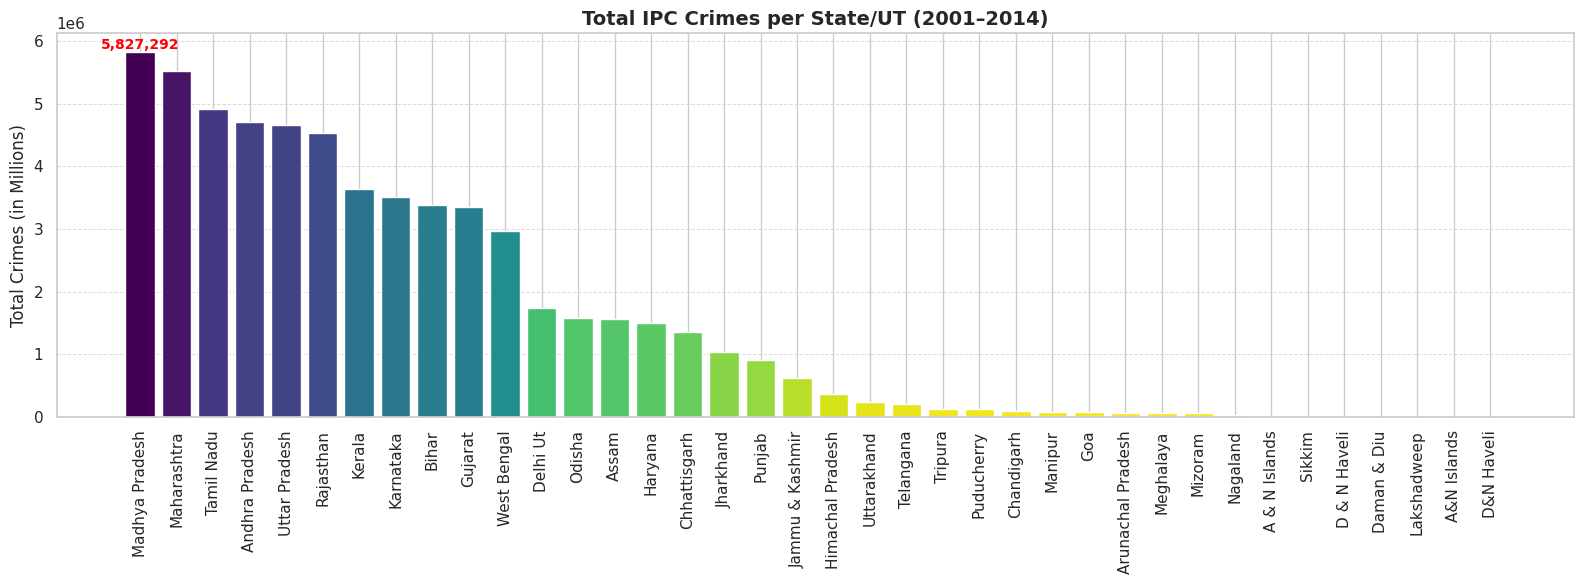

In [186]:
import matplotlib.pyplot as plt
import pandas as pd

state_crime_dist = df.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=False)

plt.figure(figsize=(16, 6))
colors = plt.cm.viridis_r(state_crime_dist.values / max(state_crime_dist.values))
bars = plt.bar(state_crime_dist.index, state_crime_dist.values, color=colors, alpha=1.0)

max_value = state_crime_dist.max()
max_index = state_crime_dist.idxmax()

for bar in bars:
    height = bar.get_height()
    if height == max_value:
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,}',
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')

plt.title('Total IPC Crimes per State/UT (2001–2014)', fontsize=14, fontweight='bold')
plt.ylabel('Total Crimes (in Millions)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

## **4. Urban vs. Rural Crime Distribution**



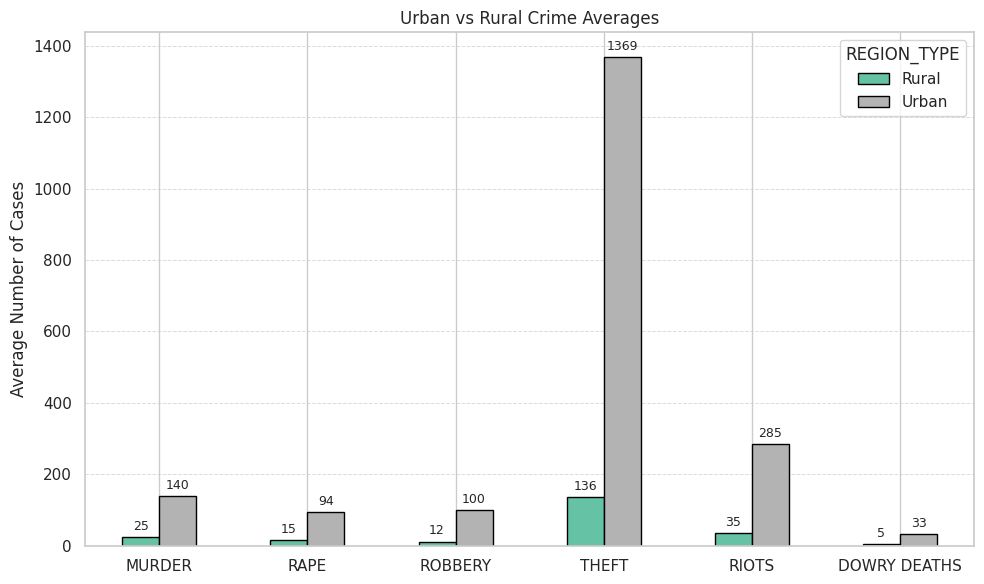

In [187]:
import matplotlib.pyplot as plt
import pandas as pd

district_avg_crimes = df.groupby('DISTRICT')['TOTAL IPC CRIMES'].mean()
crime_median = district_avg_crimes.median()

urban_rural_map = district_avg_crimes.apply(lambda x: 'Urban' if x > crime_median else 'Rural').to_dict()
df['REGION_TYPE'] = df['DISTRICT'].map(urban_rural_map)

selected_crimes = ['MURDER', 'RAPE', 'ROBBERY', 'THEFT', 'RIOTS', 'DOWRY DEATHS']
urban_vs_rural = df.groupby('REGION_TYPE')[selected_crimes].mean().round(2)

ax = urban_vs_rural.T.plot(kind='bar', figsize=(10, 6), colormap='Set2', edgecolor='black', title='Urban vs Rural Crime Averages')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=9)

plt.ylabel("Average Number of Cases")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

In [188]:
urban_vs_rural.reset_index()

,REGION_TYPE,MURDER,RAPE,ROBBERY,THEFT,RIOTS,DOWRY DEATHS
0,Rural,25.29,15.37,11.71,136.15,34.75,5.30
1,Urban,140.32,94.19,99.57,1368.96,284.74,32.59


## **5. Correlation Between Murder and Theft**


===== Correlation Summary =====
🔵 Pearson Correlation (linear):   0.80
🟣 Spearman Correlation (ranked): 0.64



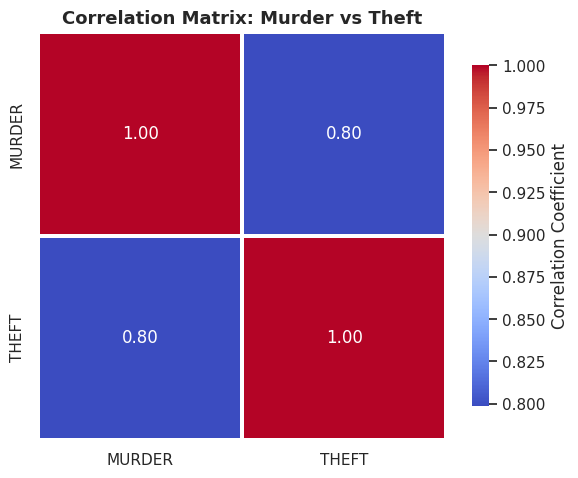

In [189]:
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

corr_pearson, _ = pearsonr(df['MURDER'], df['THEFT'])
corr_spearman, _ = spearmanr(df['MURDER'], df['THEFT'])

correlation_matrix = df[['MURDER', 'THEFT']].corr()

print("===== Correlation Summary =====")
print(f"🔵 Pearson Correlation (linear):   {corr_pearson:.2f}")
print(f"🟣 Spearman Correlation (ranked): {corr_spearman:.2f}")
print("================================\n")

plt.figure(figsize=(6, 5))
sns.set(style="whitegrid")
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=1.5,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)
plt.title("Correlation Matrix: Murder vs Theft", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# **Data Visualization Questions**

## **1. Top 10 crime-heavy districts**

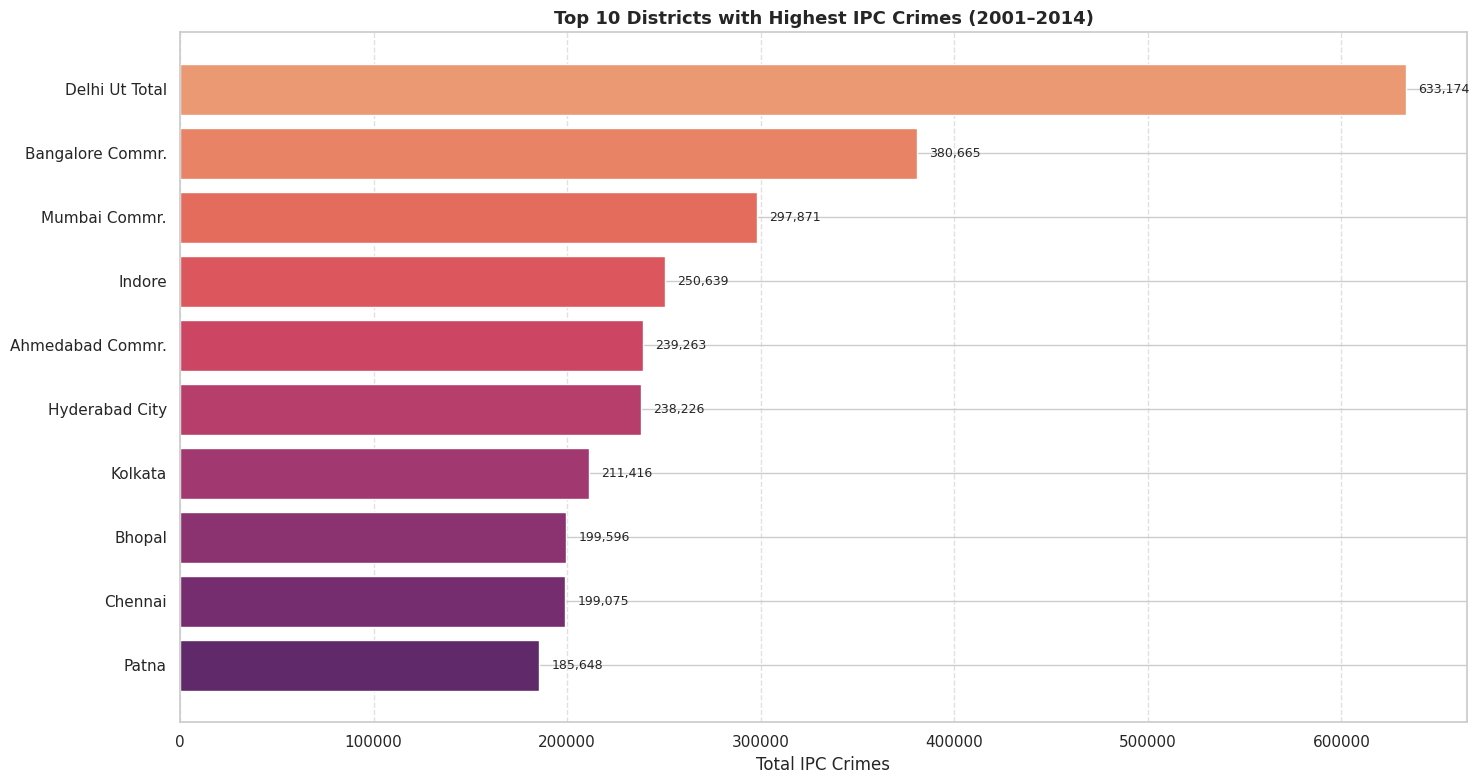

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

top10_districts = (
    df[df['DISTRICT'].str.upper() != 'TOTAL']
    .groupby('DISTRICT')['TOTAL IPC CRIMES']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(15, 8))
colors = sns.color_palette("flare", len(top10_districts))
bars = plt.barh(top10_districts.index, top10_districts.values, color=colors)

for bar in bars:
    width = bar.get_width()
    plt.text(width + max(top10_districts.values)*0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', va='center', fontsize=9)

plt.title("Top 10 Districts with Highest IPC Crimes (2001–2014)", fontsize=13, fontweight='bold')
plt.xlabel("Total IPC Crimes")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [191]:
top10_districts = (
    df[df['DISTRICT'].str.upper() != 'TOTAL']  # inline filtering
    .groupby('DISTRICT')['TOTAL IPC CRIMES']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top10_districts)

DISTRICT
Delhi Ut Total      633174
Bangalore Commr.    380665
Mumbai Commr.       297871
Indore              250639
Ahmedabad Commr.    239263
Hyderabad City      238226
Kolkata             211416
Bhopal              199596
Chennai             199075
Patna               185648
Name: TOTAL IPC CRIMES, dtype: int64


## **2. Distribution of IPC crimes**

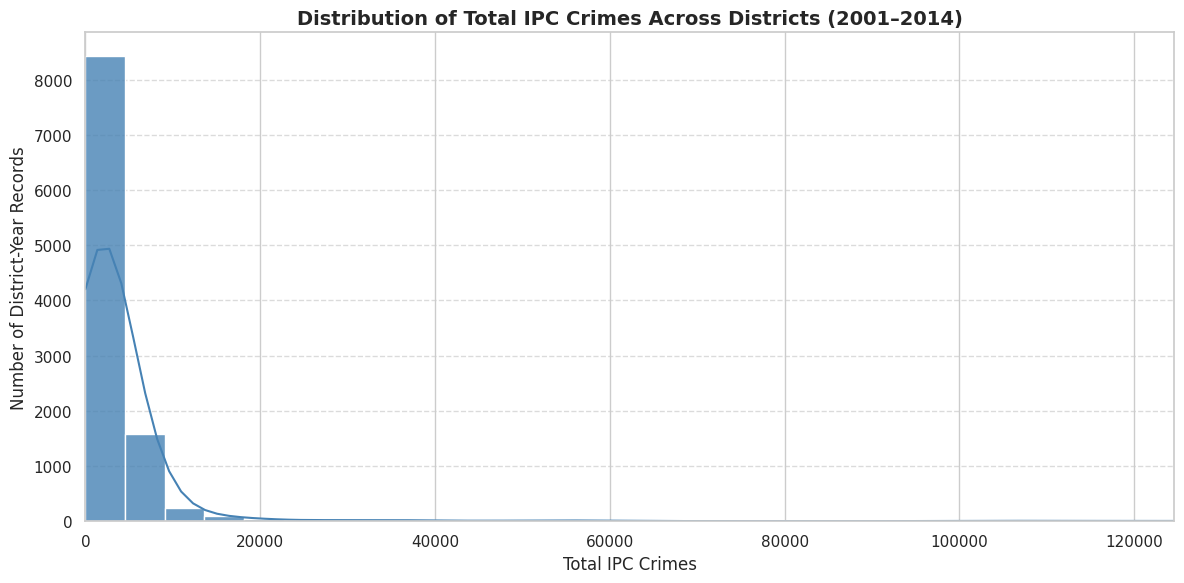

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

upper_limit = df['TOTAL IPC CRIMES'].quantile(0.99)

plt.figure(figsize=(12, 6))
sns.histplot(
    df['TOTAL IPC CRIMES'],
    bins=60,
    kde=True,
    color="steelblue",
    edgecolor="white",
    alpha=0.8
)

plt.xlim(0, upper_limit)

plt.title("Distribution of Total IPC Crimes Across Districts (2001–2014)", fontsize=14, fontweight='bold')
plt.xlabel("Total IPC Crimes", fontsize=12)
plt.ylabel("Number of District-Year Records", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **3. Violent Crime Trends – Murder vs Rape**

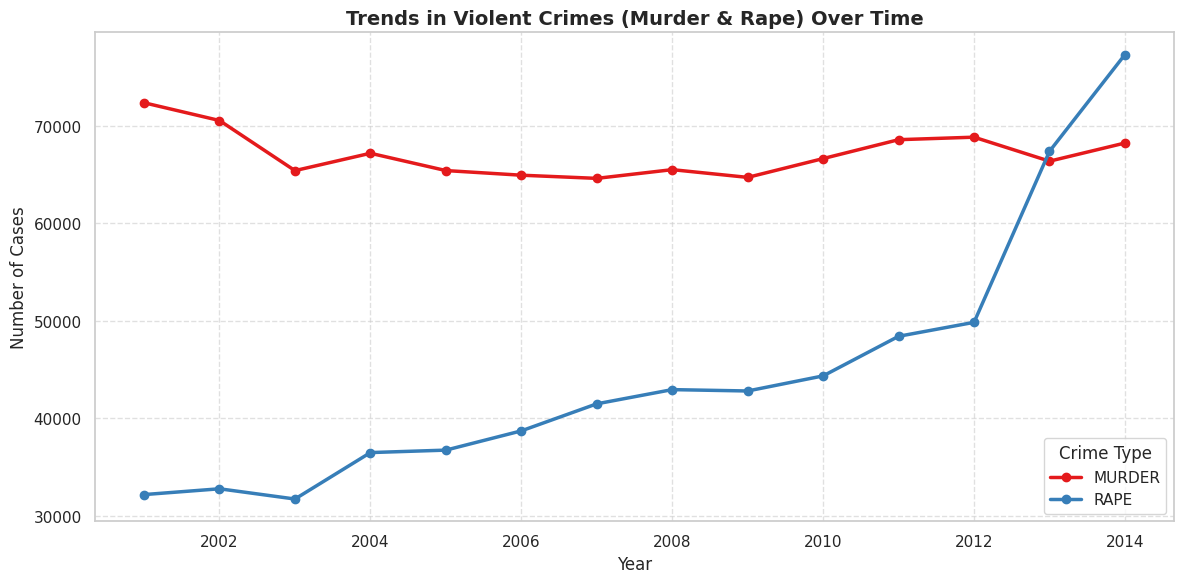

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

violent_crime = df.groupby('YEAR')[['MURDER', 'RAPE']].sum()

sns.set(style='whitegrid')
colors = sns.color_palette("Set1", n_colors=2)

plt.figure(figsize=(12, 6))
for i, col in enumerate(violent_crime.columns):
    plt.plot(violent_crime.index, violent_crime[col], label=col, color=colors[i],
             marker='o', linewidth=2.5)

plt.title("Trends in Violent Crimes (Murder & Rape) Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()

## **4. Geospatial Map (Crime Hotspots by State — Matplotlib)**

Index(['shapeName', 'shapeISO', 'shapeID', 'shapeGroup', 'shapeType',
       'geometry'],
      dtype='object')


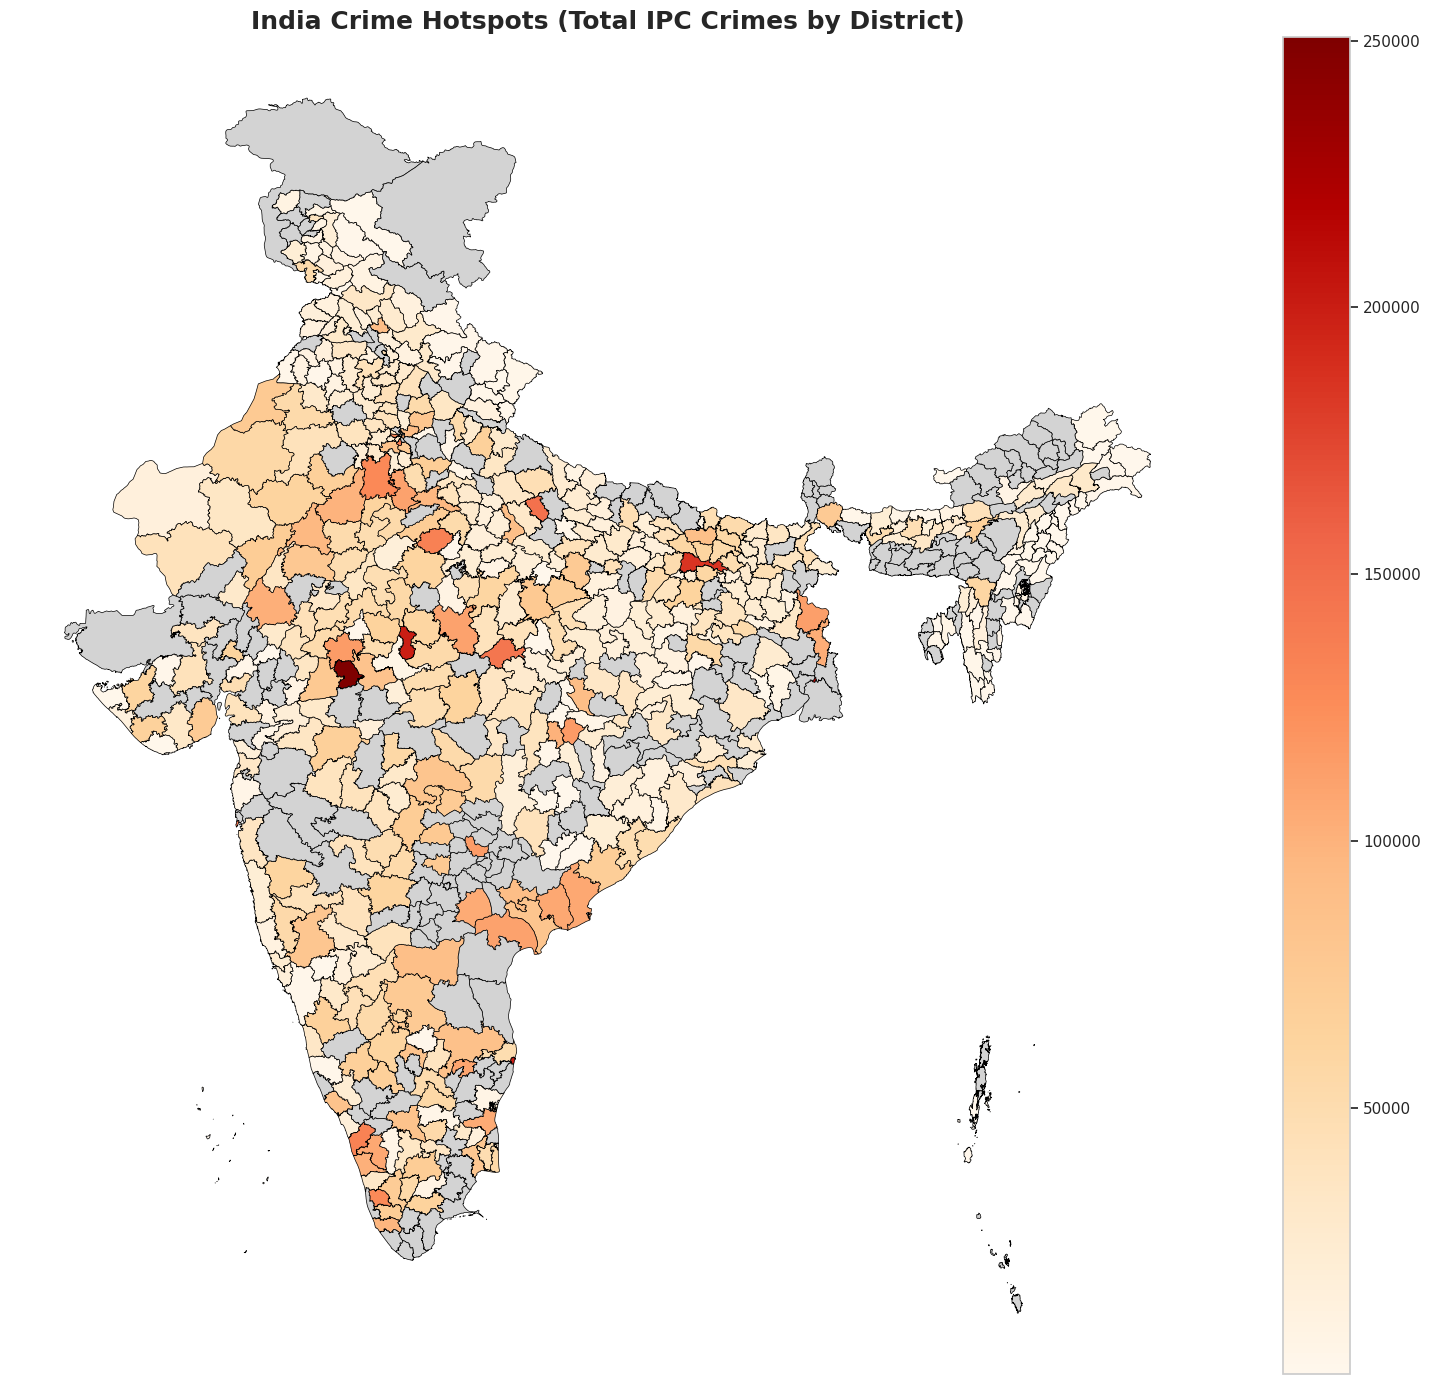

In [194]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib as mpl

# Load and prepare data
crime_df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014.csv")
crime_df.columns = crime_df.columns.str.strip()
crime_df = crime_df[~crime_df['DISTRICT'].str.upper().str.contains('TOTAL')]
crime_df['TOTAL IPC CRIMES'] = pd.to_numeric(crime_df['TOTAL IPC CRIMES'], errors='coerce')
crime_by_district = crime_df.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum().reset_index()

# Load GeoJSON
gdf = gpd.read_file("/content/geoBoundaries-IND-ADM2.geojson")

# Rename district column if necessary
print(gdf.columns)  # check and replace below if different
gdf = gdf.rename(columns={'shapeName': 'DISTRICT'})

# Merge data
gdf['DISTRICT'] = gdf['DISTRICT'].str.upper()
crime_by_district['DISTRICT'] = crime_by_district['DISTRICT'].str.upper()
merged = gdf.merge(crime_by_district, on='DISTRICT', how='left')

# Plot
fig, ax = plt.subplots(figsize=(16, 14))
divider = mpl.colors.Normalize(vmin=merged['TOTAL IPC CRIMES'].min(), vmax=merged['TOTAL IPC CRIMES'].max())

# Plotting the districts
merged.plot(column='TOTAL IPC CRIMES',
            cmap='OrRd',
            linewidth=0.5,
            ax=ax,
            edgecolor='black',
            legend=True,
            norm=divider,
            missing_kwds={'color': 'lightgrey', 'label': 'No data'})

# Make it clean
ax.set_title("India Crime Hotspots (Total IPC Crimes by District)", fontsize=18, weight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

# **Advanced Analytics**


## **1. State with lowest crime rate**

In [195]:
state_crimes = df.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().reset_index()

state_crimes['STATE/UT'] = state_crimes['STATE/UT'].str.title().str.strip()

lowest_state = state_crimes.sort_values(by='TOTAL IPC CRIMES', ascending=True).head(1)

print("📉 State/UT with the Lowest Total IPC Crimes (2001–2014):")
print(lowest_state.to_string(index=False))

print("\nPossible reasons for low crime:")
print("- Small population and geographic size")
print("- Limited urbanization and industrial zones")
print("- Lower reporting or administrative coverage")
print("- High police-to-population ratio relative to urban metros")

📉 State/UT with the Lowest Total IPC Crimes (2001–2014):
  STATE/UT  TOTAL IPC CRIMES
D&N Haveli               554

Possible reasons for low crime:
- Small population and geographic size
- Limited urbanization and industrial zones
- Lower reporting or administrative coverage
- High police-to-population ratio relative to urban metros


## **Most common crime per district**

In [196]:
non_crime_cols = ['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL IPC CRIMES']
crime_columns = [col for col in df.columns if col not in non_crime_cols]

for col in crime_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

crime_columns = df[crime_columns].select_dtypes(include='number').columns.tolist()

df['CRIME COUNT'] = df[crime_columns].apply(pd.to_numeric, errors='coerce').max(axis=1)

crime_columns = [col for col in crime_columns if col != 'CRIME COUNT']

crime_columns = [col for col in crime_columns if col not in ['CRIME COUNT', 'OTHER IPC CRIMES']]

df['MOST COMMON CRIME'] = df[crime_columns].idxmax(axis=1)

latest_year = pd.to_numeric(df['YEAR'], errors='coerce').max()
latest = df[df['YEAR'] == latest_year][['STATE/UT', 'DISTRICT', 'MOST COMMON CRIME', 'CRIME COUNT']]

latest.head(20)

,STATE/UT,DISTRICT,MOST COMMON CRIME,CRIME COUNT
9840,Andhra Pradesh,Anantapur,THEFT,3800
9841,Andhra Pradesh,Chittoor,CAUSING DEATH BY NEGLIGENCE,2567
9842,Andhra Pradesh,Cuddapah,THEFT,2604
9843,Andhra Pradesh,East Godavari,THEFT,3791
9844,Andhra Pradesh,Guntakal Railway,THEFT,413
9845,Andhra Pradesh,Guntur,THEFT,2606
9846,Andhra Pradesh,Guntur Urban,THEFT,1740
9847,Andhra Pradesh,Krishna,CRUELTY BY HUSBAND OR HIS RELATIVES,3942
9848,Andhra Pradesh,Kurnool,CHEATING,3522
9849,Andhra Pradesh,Nellore,THEFT,3037


## **K-Means Clustering**

<ipython-input-197-08830034e123>:76: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.



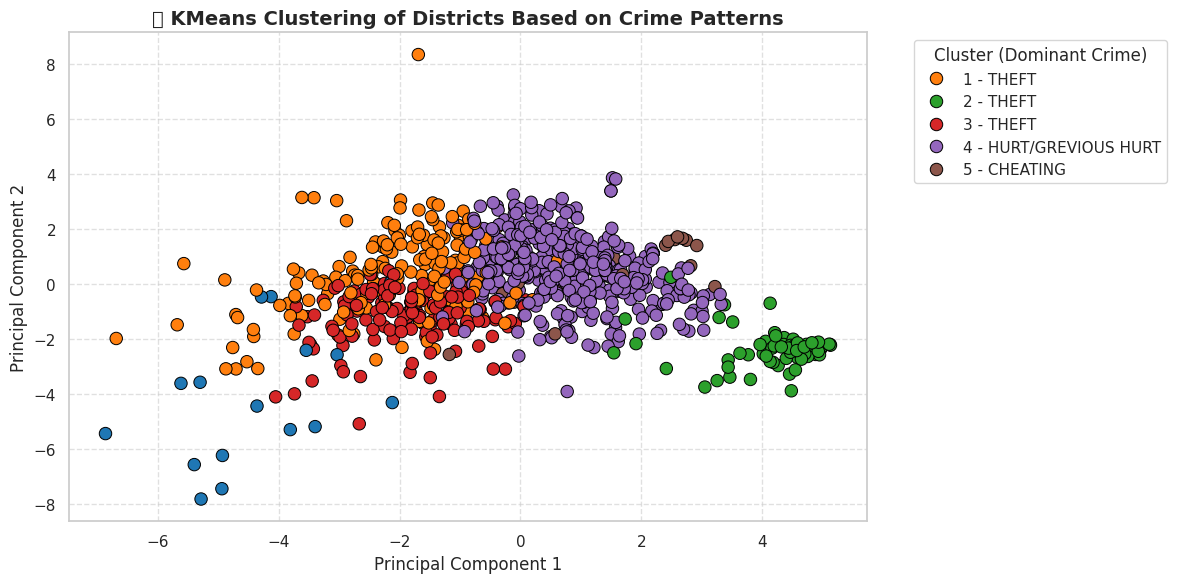

In [197]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Prepare district-level average crime data
exclude_cols = [
    'STATE/UT', 'YEAR', 'REGION_TYPE', 'TOP_CRIME', 'CLUSTER', 'COMMON_CRIME',
    'TOTAL IPC CRIMES', 'OTHER IPC CRIMES', 'CRIME COUNT'
]

# Choose only numeric crime columns
crime_columns = [
    col for col in df.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(df[col])
]

# Step 2: Group by DISTRICT (district-level crime patterns)
district_crime = df.groupby('DISTRICT')[crime_columns].mean().reset_index()

# Step 3: Standardize features
scaler = StandardScaler()
crime_props = district_crime[crime_columns].div(district_crime[crime_columns].sum(axis=1), axis=0)
crime_props = district_crime[crime_columns].div(
    district_crime[crime_columns].sum(axis=1), axis=0
)
crime_props = crime_props.fillna(0)  # replacing NaNs caused by division by zero

# Step 4: Standardize and Cluster
X_scaled = scaler.fit_transform(crime_props)
kmeans = KMeans(n_clusters=6, random_state=42)
district_crime['CLUSTER'] = kmeans.fit_predict(X_scaled)

# Step 5: Get dominant crime per cluster
cluster_profiles = crime_props.groupby(district_crime['CLUSTER']).mean()
cluster_dominant_crime = cluster_profiles.idxmax(axis=1).to_dict()
district_crime['COMMON_CRIME'] = district_crime['CLUSTER'].map(cluster_dominant_crime)

# Step 6: Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
district_crime['PCA1'] = X_pca[:, 0]
district_crime['PCA2'] = X_pca[:, 1]

# Step 7: Plot results
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=district_crime,
    x='PCA1',
    y='PCA2',
    hue='CLUSTER',
    palette='tab10',
    s=80,
    edgecolor='black'
)
plt.title("📍 KMeans Clustering of Districts Based on Crime Patterns", fontsize=14, fontweight='bold')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle='--', alpha=0.6)

# Legend with crime labels instead of cluster numbers
handles, labels = scatter.get_legend_handles_labels()
custom_labels = [
    f"{label} - {cluster_dominant_crime[int(label)]}" for label in labels[1:]
]
plt.legend(
    handles=handles[1:],
    labels=custom_labels,
    title="Cluster (Dominant Crime)",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()

<ipython-input-198-8057dfaf39fd>:80: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.



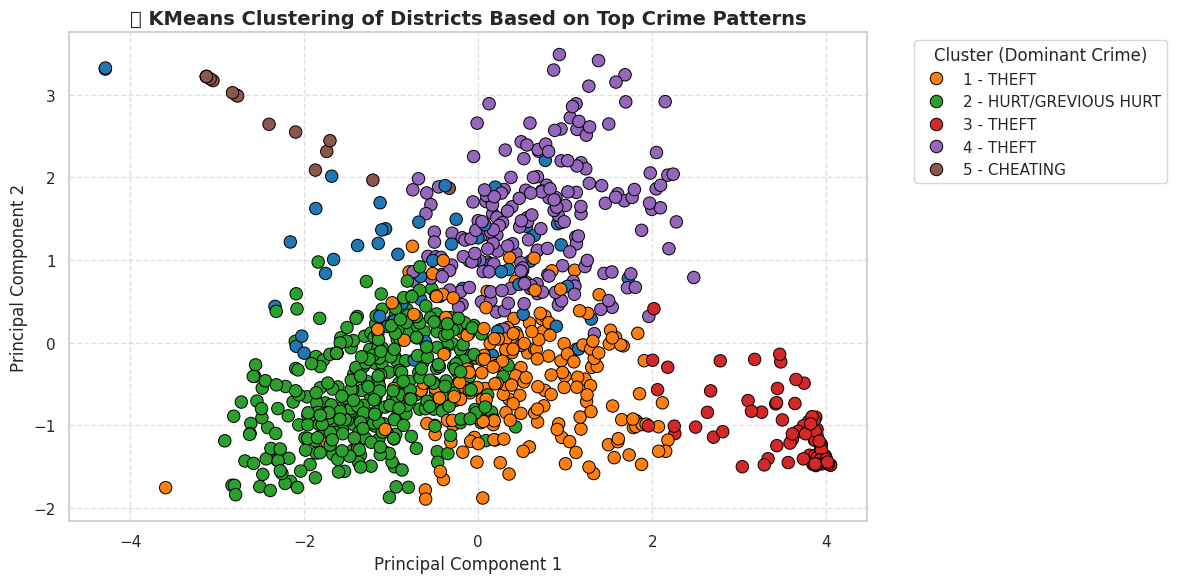

In [198]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Prepare district-level crime data
exclude_cols = [
    'STATE/UT', 'YEAR', 'REGION_TYPE', 'TOP_CRIME', 'CLUSTER', 'COMMON_CRIME',
    'TOTAL IPC CRIMES', 'OTHER IPC CRIMES', 'CRIME COUNT'
]

# Select only numeric crime columns
crime_columns = [
    col for col in df.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(df[col])
]

# Step 2: Group by district (average crime rates)
district_crime = df.groupby('DISTRICT')[crime_columns].mean().reset_index()

# Step 3: Select top 7 most variable crimes
crime_std = district_crime[crime_columns].std().sort_values(ascending=False)
top_crimes = crime_std.head(7).index.tolist()

# Step 4: Normalize crimes to get proportions
crime_props = district_crime[top_crimes].div(
    district_crime[top_crimes].sum(axis=1), axis=0
)
crime_props = crime_props.fillna(0)

# Step 5: Standardize features and apply KMeans clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(crime_props)

kmeans = KMeans(n_clusters=6, random_state=42)
district_crime['CLUSTER'] = kmeans.fit_predict(X_scaled)

# Step 6: Get dominant crime per cluster
cluster_profiles = crime_props.groupby(district_crime['CLUSTER']).mean()
cluster_dominant_crime = cluster_profiles.idxmax(axis=1).to_dict()
district_crime['COMMON_CRIME'] = district_crime['CLUSTER'].map(cluster_dominant_crime)

# Step 7: PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
district_crime['PCA1'] = X_pca[:, 0]
district_crime['PCA2'] = X_pca[:, 1]

# Step 8: Plot
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=district_crime,
    x='PCA1',
    y='PCA2',
    hue='CLUSTER',
    palette='tab10',
    s=80,
    edgecolor='black'
)
plt.title("📍 KMeans Clustering of Districts Based on Top Crime Patterns", fontsize=14, fontweight='bold')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle='--', alpha=0.6)

# Better cluster legend with dominant crimes
handles, labels = scatter.get_legend_handles_labels()
custom_labels = [
    f"{label} - {cluster_dominant_crime[int(label)]}" for label in labels[1:]
]
plt.legend(
    handles=handles[1:],
    labels=custom_labels,
    title="Cluster (Dominant Crime)",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


<ipython-input-199-9865b39d9b21>:91: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.



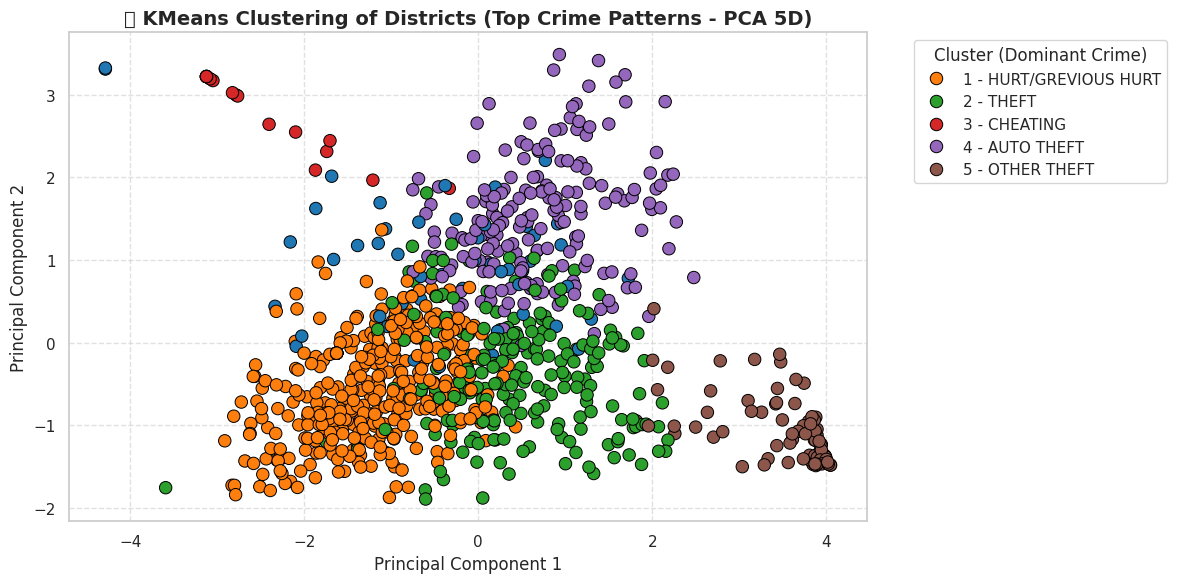

In [199]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Filter relevant crime features
exclude_cols = [
    'STATE/UT', 'YEAR', 'REGION_TYPE', 'TOP_CRIME', 'CLUSTER', 'COMMON_CRIME',
    'TOTAL IPC CRIMES', 'OTHER IPC CRIMES', 'CRIME COUNT'
]

crime_columns = [
    col for col in df.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(df[col])
]

# Step 2: District-level mean aggregation
district_crime = df.groupby('DISTRICT')[crime_columns].mean().reset_index()

# Step 3: Select top 7 most variable crimes
top_crimes = district_crime[crime_columns].std().sort_values(ascending=False).head(7).index.tolist()

# Step 4: Normalize crime columns to proportions
crime_props = district_crime[top_crimes].div(
    district_crime[top_crimes].sum(axis=1), axis=0
).fillna(0)

# Step 5: Standardize and reduce using PCA (5 components)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(crime_props)
pca_feats = PCA(n_components=5).fit_transform(X_scaled)

# Step 6: Apply KMeans clustering with adjusted cluster count
n_clusters = min(6, len(district_crime))  # Ensure n_clusters does not exceed the number of districts
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
district_crime['CLUSTER'] = kmeans.fit_predict(pca_feats)

# Step 7: Find dominant crime type per cluster with unique labels
cluster_profiles = crime_props.groupby(district_crime['CLUSTER']).mean()

cluster_dominant_crime = {}
used_crimes = set()

for cluster in cluster_profiles.index:
    # Get top crimes in case of duplicates
    top_crimes_in_cluster = cluster_profiles.loc[cluster].nlargest(2).index.tolist()
    for crime in top_crimes_in_cluster:
        if crime not in used_crimes:
            cluster_dominant_crime[cluster] = crime
            used_crimes.add(crime)
            break
    else:  # Fallback if all top crimes are used
        cluster_dominant_crime[cluster] = f"Cluster_{cluster}"

district_crime['COMMON_CRIME'] = district_crime['CLUSTER'].map(cluster_dominant_crime)

# Step 8: 2D PCA for visualization
X_vis = PCA(n_components=2).fit_transform(pca_feats)
district_crime['PCA1'] = X_vis[:, 0]
district_crime['PCA2'] = X_vis[:, 1]

# Step 9: Visualization
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=district_crime,
    x='PCA1',
    y='PCA2',
    hue='CLUSTER',
    palette='tab10',
    s=80,
    edgecolor='black'
)
plt.title("📍 KMeans Clustering of Districts (Top Crime Patterns - PCA 5D)", fontsize=14, fontweight='bold')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle='--', alpha=0.6)

# Custom cluster legend with updated labels
handles, labels = scatter.get_legend_handles_labels()
custom_labels = [f"{label} - {cluster_dominant_crime[int(label)]}" for label in labels[1:]]
plt.legend(
    handles=handles[1:],
    labels=custom_labels,
    title="Cluster (Dominant Crime)",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


In [200]:
print(df.columns)
df_original = df.copy()

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'REGION_TYPE', 'CRIME COUNT', 'MOST COMMON CRIME'],
      dtype='object')


 Predict high-crime vs low-crime


Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



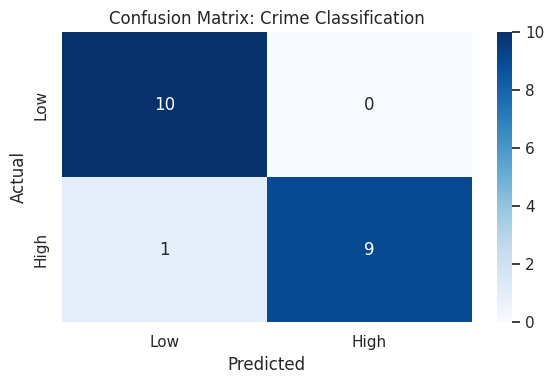


Sample of classified districts:
      DISTRICT  TOTAL IPC CRIMES  CRIME_LABEL  PREDICTED_LABEL
0   District_1               172            1                1
1   District_2               161            0                0
2   District_3               162            0                0
3   District_4               149            0                0
4   District_5               154            0                0
5   District_6               156            0                0
6   District_7               155            0                0
7   District_8               167            1                1
8   District_9               155            0                0
9  District_10               142            0                0


In [201]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ==== STEP 1: Sample district-level dataset ====
# Replace with your actual data containing crime features
np.random.seed(42)
districts = [f"District_{i}" for i in range(1, 101)]
df = pd.DataFrame({
    'STATE/UT': ['State_X'] * 100,
    'DISTRICT': districts,
    'MURDER': np.random.poisson(5, 100),
    'THEFT': np.random.poisson(100, 100),
    'RAPE': np.random.poisson(10, 100),
    'BURGLARY': np.random.poisson(50, 100),
})
df['TOTAL IPC CRIMES'] = df[['MURDER', 'THEFT', 'RAPE', 'BURGLARY']].sum(axis=1)

# ==== STEP 2: Create high vs low crime labels ====
threshold = df['TOTAL IPC CRIMES'].median()
df['CRIME_LABEL'] = (df['TOTAL IPC CRIMES'] > threshold).astype(int)

# ==== STEP 3: Features and Labels ====
features = ['MURDER', 'THEFT', 'RAPE', 'BURGLARY']
X = df[features]
y = df['CRIME_LABEL']

# ==== STEP 4: Train/test split ====
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ==== STEP 5: Train classifier ====
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ==== STEP 6: Predict & evaluate ====
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ==== STEP 7: Confusion Matrix ====
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Crime Classification')
plt.tight_layout()
plt.show()

# ==== STEP 8: Add predictions to DataFrame ====
df['PREDICTED_LABEL'] = model.predict(X)
print("\nSample of classified districts:")
print(df[['DISTRICT', 'TOTAL IPC CRIMES', 'CRIME_LABEL', 'PREDICTED_LABEL']].head(10))

Predict future crime trends using regression analysis.


 Forecasted IPC Crimes for 2015–2019:
   Year  Predicted IPC Crimes
0  2015               2699824
1  2016               2779591
2  2017               2859358
3  2018               2939125
4  2019               3018892


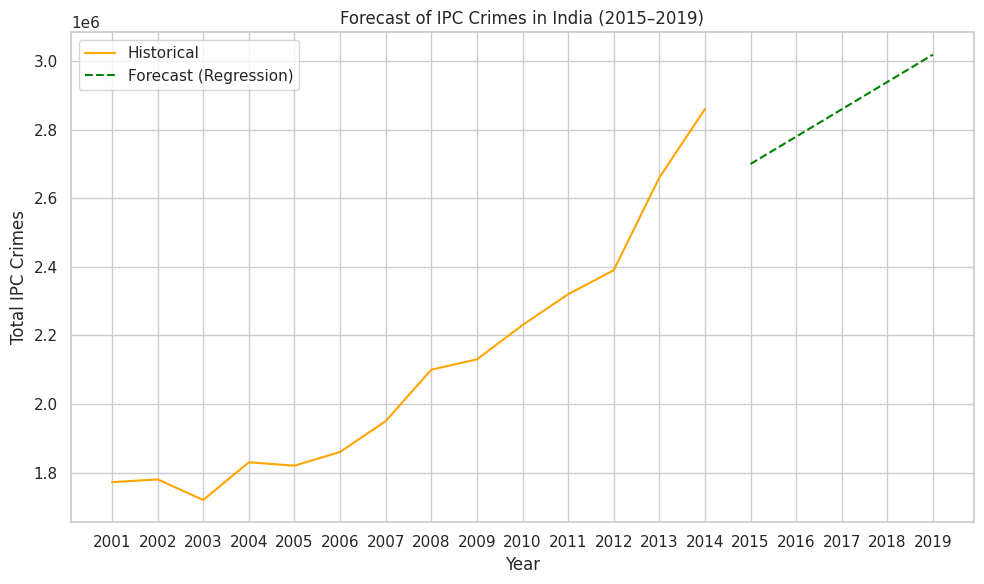

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Historical data
years = np.array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
                  2011, 2012, 2013, 2014]).reshape(-1, 1)
ipc_crimes = np.array([1772000, 1780000, 1720000, 1830000, 1820000, 1860000,
                       1950000, 2100000, 2130000, 2230000, 2320000, 2390000,
                       2660000, 2860000])

# Step 2: Fit the linear regression model
model = LinearRegression()
model.fit(years, ipc_crimes)

# Step 3: Predict for next 5 years
future_years = np.array([2015, 2016, 2017, 2018, 2019]).reshape(-1, 1)
predicted_crimes = model.predict(future_years)

# Step 4: Create a forecast table
forecast_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted IPC Crimes': predicted_crimes.astype(int)
})
print("\n Forecasted IPC Crimes for 2015–2019:")
print(forecast_df)

# Step 5 (optional): Plot the results
plt.figure(figsize=(10, 6))
plt.plot(years.flatten(), ipc_crimes, label='Historical', color='orange')
plt.plot(future_years.flatten(), predicted_crimes, label='Forecast (Regression)', linestyle='--', color='green')
plt.title("Forecast of IPC Crimes in India (2015–2019)")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.xticks(list(years.flatten()) + list(future_years.flatten()))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Crime Risk Index

In [203]:
df_all['CRIME_RISK_INDEX'] = df_all['TOTAL IPC CRIMES'] / df_all['TOTAL IPC CRIMES'].max()
df_all[['DISTRICT', 'STATE/UT', 'CRIME_RISK_INDEX']].sort_values(by='CRIME_RISK_INDEX', ascending=False).head()

,DISTRICT,STATE/UT,CRIME_RISK_INDEX
10245,Total,Madhya Pradesh,1.000000
10292,Total,Maharashtra,0.917081
10596,Total,Uttar Pradesh,0.882726
9472,Zz Total,Maharashtra,0.860372
9426,Zz Total,Madhya Pradesh,0.834926


Bonus Questions

 % of crimes against women

In [204]:
women_crimes = df_all[['RAPE', 'DOWRY DEATHS', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
                       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
                       'INSULT TO MODESTY OF WOMEN']].sum().sum()
total = df_all['TOTAL IPC CRIMES'].sum()
print(f"Percentage of crimes against women: {(women_crimes / total) * 100:.2f}%")


Percentage of crimes against women: 7.77%


State with highest dowry deaths

In [205]:
dowry_by_state = df_all.groupby('STATE/UT')['DOWRY DEATHS'].sum().sort_values(ascending=False)
print("State with Highest Dowry Deaths:")
print(dowry_by_state.head(1))


State with Highest Dowry Deaths:
STATE/UT
Uttar Pradesh    57256
Name: DOWRY DEATHS, dtype: int64


Top 10 High-Crime Districts:
   STATE/UT     DISTRICT  TOTAL IPC CRIMES
97  State_X  District_97               197
33  State_X  District_39               189
17  State_X  District_24               189
51  State_X  District_55               187
71  State_X  District_73               183
48  State_X  District_52               182
94  State_X  District_94               182
58  State_X  District_61               180
31  State_X  District_37               180
3   State_X  District_11               178


<ipython-input-206-bb364aadeac0>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




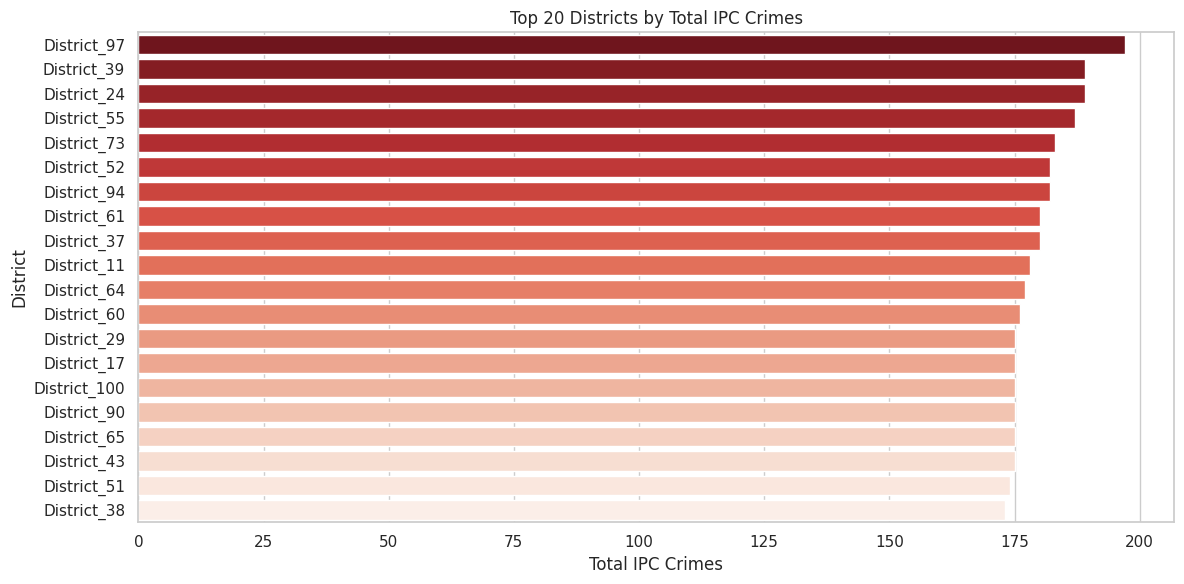

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by district and get total crimes
district_crime = df.groupby(['STATE/UT', 'DISTRICT'])['TOTAL IPC CRIMES'].sum().reset_index()

# Sort by highest total crimes
district_crime_sorted = district_crime.sort_values(by='TOTAL IPC CRIMES', ascending=False)

# Display top 10 high-crime districts
print("Top 10 High-Crime Districts:")
print(district_crime_sorted.head(10))

# Plot top 20 districts
plt.figure(figsize=(12, 6))
sns.barplot(data=district_crime_sorted.head(20), x='TOTAL IPC CRIMES', y='DISTRICT', palette='Reds_r')
plt.title('Top 20 Districts by Total IPC Crimes')
plt.xlabel('Total IPC Crimes')
plt.ylabel('District')
plt.tight_layout()
plt.show()


Insight:
Cities with higher urbanization, population, or economic activity tend to report more crimes.
Capital cities or metro districts (e.g., Delhi, Mumbai, Bangalore) usually rank high.
Visualization helps pinpoint clusters of concern.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

<ipython-input-210-5bd2b601fa26>:40: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s)

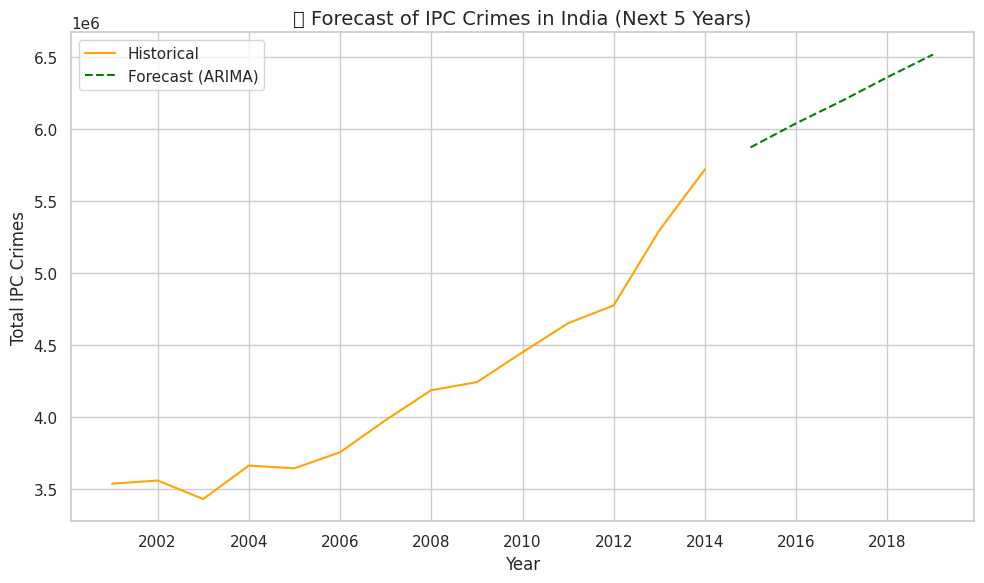

In [210]:
from statsmodels.tsa.arima.model import ARIMA
# Group by year and sum total IPC crimes
df_yearly = df_original.groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()

# Convert 'YEAR' to datetime (setting to Jan 1st of each year)
df_yearly['DATE'] = pd.to_datetime(df_yearly['YEAR'], format='%Y')

# Set date as index for time series
df_ts = df_yearly.set_index('DATE')['TOTAL IPC CRIMES']
# Group by year and sum total IPC crimes
df_yearly = df_original.groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()

# Convert 'YEAR' to datetime (setting to Jan 1st of each year)
df_yearly['DATE'] = pd.to_datetime(df_yearly['YEAR'], format='%Y')

# Set date as index for time series
df_ts = df_yearly.set_index('DATE')['TOTAL IPC CRIMES']
# Fit ARIMA model (can use auto_arima for tuning if needed)
model = ARIMA(df_ts, order=(2, 1, 2))  # You can experiment with orders
model_fit = model.fit()
# Forecast next 5 years (5 steps ahead)
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Create future year index
last_year = df_ts.index[-1].year
future_years = pd.date_range(start=f'{last_year+1}', periods=forecast_steps, freq='YS')

# Convert forecast to series
forecast_series = pd.Series(forecast, index=future_years)
plt.figure(figsize=(10, 6))
plt.plot(df_ts, label='Historical', color='orange')
plt.plot(forecast_series, label='Forecast (ARIMA)', linestyle='--', color='green')

plt.title("📈 Forecast of IPC Crimes in India (Next 5 Years)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
